<a href="https://colab.research.google.com/github/sharp-guy-dev/clustering_platzi/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [2]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

In [3]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)


In [5]:
X

array([[ -0.23607431,   2.57087579],
       [  2.41791839,   5.45737597],
       [  1.85001325,   5.11400153],
       [  4.27161942,   5.83796743],
       [ -1.61756019,   2.34799374],
       [ -0.47552267,   3.57919277],
       [ -1.69097665,   1.54311265],
       [  2.55413093,   5.78762619],
       [  5.07113745,  -5.04515652],
       [  5.50193184,  -5.56659463],
       [  6.28560953,  -8.24373293],
       [ -1.03201057,   3.55368607],
       [  2.21429268,   4.77885635],
       [ -6.9434474 ,   4.6387993 ],
       [ -8.09667218,   3.48648142],
       [  6.17566854,  -5.87597106],
       [  2.74510503,   4.46749457],
       [ -7.4827808 ,   4.54869351],
       [ -7.76575545,   5.06971426],
       [ -1.91503677,   4.28226627],
       [  3.21761474,   3.63749308],
       [  3.43258762,   2.5136267 ],
       [ -9.17613619,   3.70550709],
       [ -7.39129696,   2.86639232],
       [  6.31113467,  -5.58020525],
       [ -0.60207929,   3.61525787],
       [  2.63395731,   5.12444667],
 

In [6]:
y

array([0, 2, 2, 2, 0, 0, 0, 2, 3, 3, 3, 0, 2, 1, 1, 3, 2, 1, 1, 0, 2, 2,
       1, 1, 3, 0, 2, 3, 0, 1, 1, 2, 3, 2, 1, 3, 0, 1, 3, 0, 0, 2, 2, 2,
       1, 0, 1, 3, 2, 0, 1, 3, 0, 3, 0, 0, 0, 1, 2, 0, 1, 3, 0, 2, 0, 3,
       0, 3, 0, 0, 0, 3, 2, 1, 3, 0, 2, 0, 3, 3, 1, 3, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 3, 3, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 1, 3, 0, 2, 0, 0, 2, 2, 1, 3, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       3, 2, 0, 3, 3, 3, 2, 2, 0, 1, 2, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 1, 0, 0, 3, 1, 1, 3, 2, 1, 0, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 2,
       0, 3, 3, 2, 1, 0, 3, 1, 2, 3, 1, 2, 2, 2, 2, 3, 3, 1, 3, 0, 1, 0,
       3, 1, 3, 2, 3, 2, 1, 0, 2, 3, 3, 2, 2, 2, 1, 3, 3, 1, 3, 3, 0, 1,
       1, 0, 1, 0, 3, 2, 1, 3, 1, 2, 1, 0, 1, 0, 0, 1, 1, 3, 1, 0, 0, 3,
       3, 2, 0, 0, 1, 0, 1, 2, 3, 1, 0, 2, 1, 3, 1, 2, 2, 0, 1, 3, 3, 1,
       2, 3, 0, 3, 3, 3, 2, 2, 0, 1, 2, 0, 1, 2, 3, 1, 1, 0, 1, 2, 3, 3,
       1, 3, 3, 0, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 2,

In [7]:
c

array([[-1.20563212,  2.39232108],
       [-7.90221819,  4.3311016 ],
       [ 2.93983299,  4.7357859 ],
       [ 5.78362124, -5.94849026]])

In [8]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

## Visualización de datos

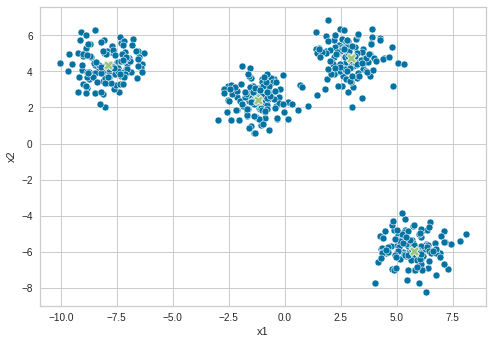

In [9]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [10]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


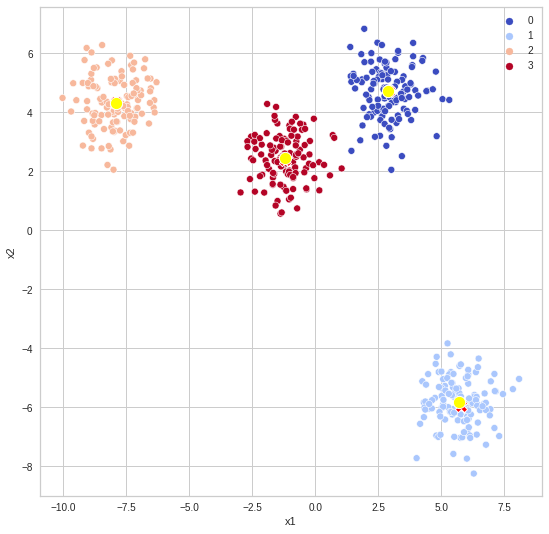

In [11]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()


In [12]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


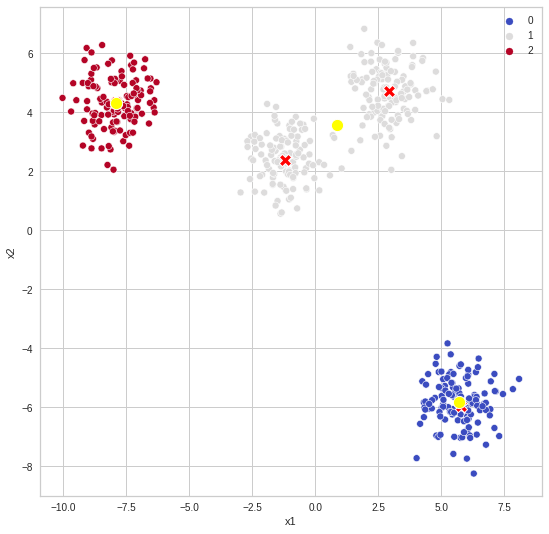

4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


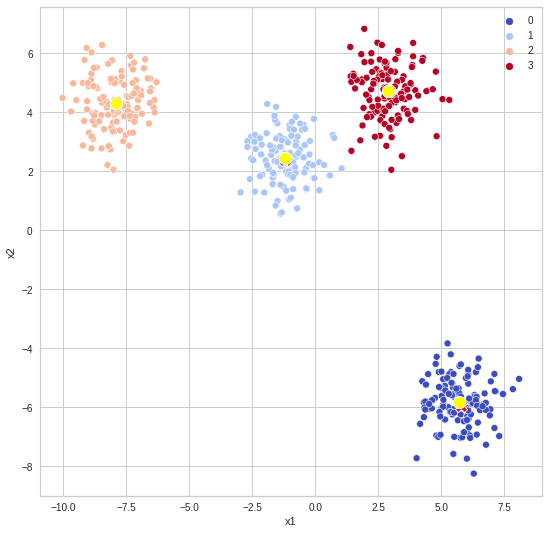

5


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


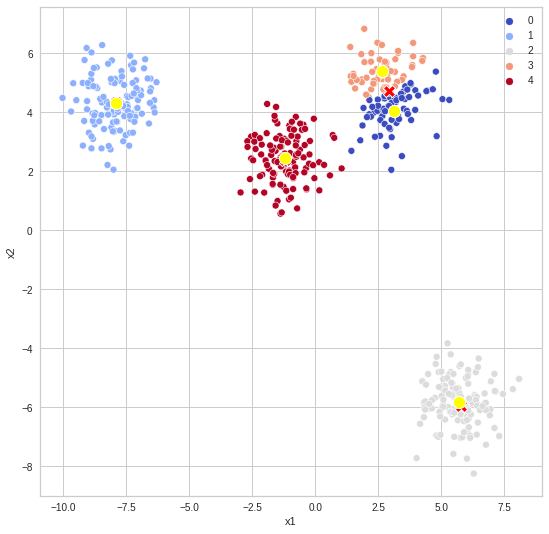

6


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


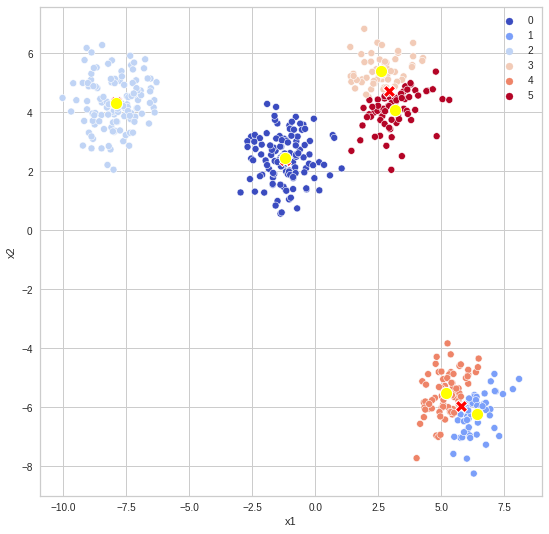

In [15]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

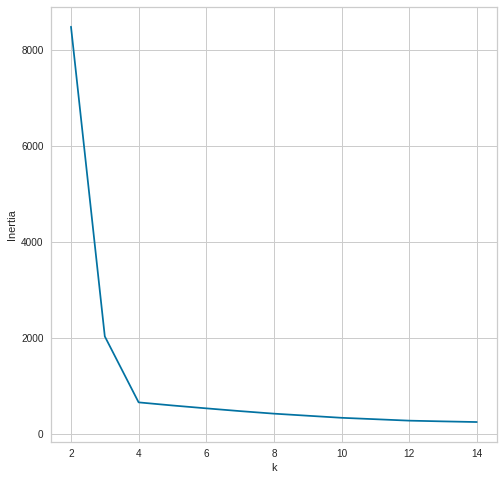

In [16]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

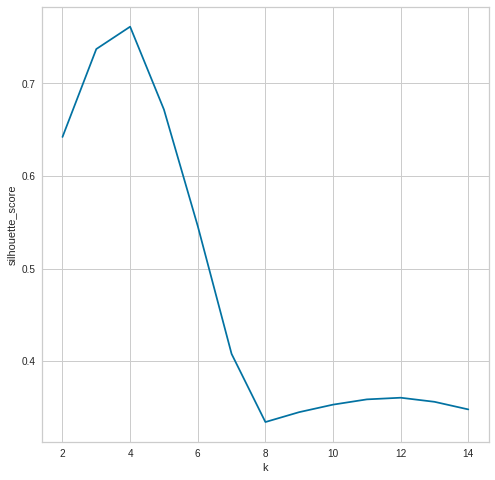

In [17]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


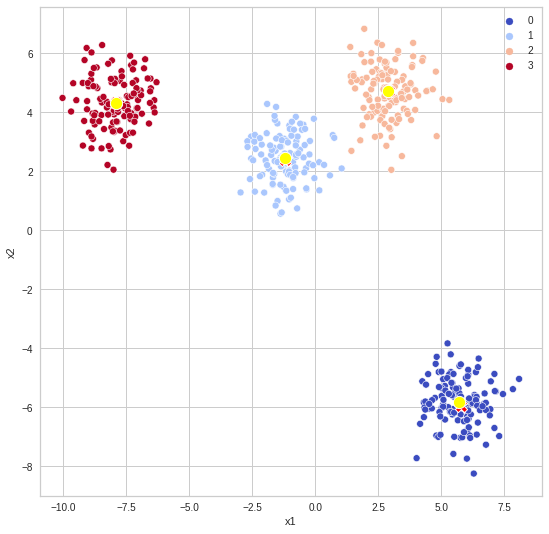

In [18]:
vis_cluster(4)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

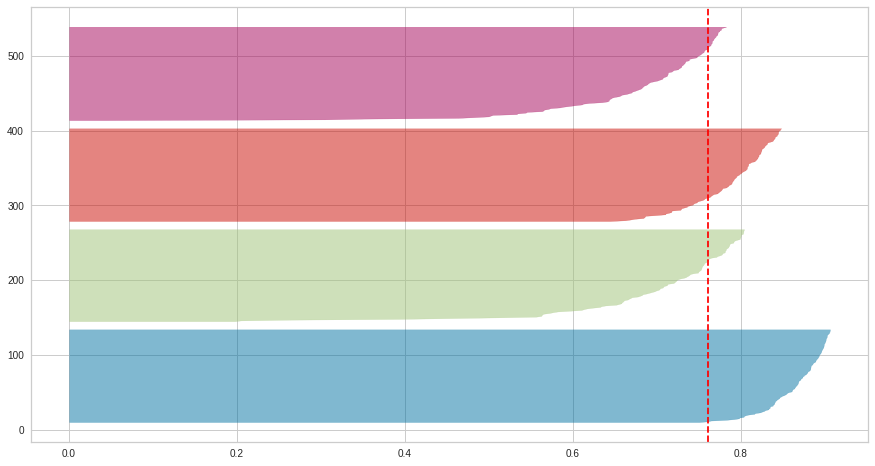

In [19]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)